In [14]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('dark_background')
1+1

In [4]:
iris =  datasets.load_iris()

In [5]:
iris_pd= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [6]:
iris_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


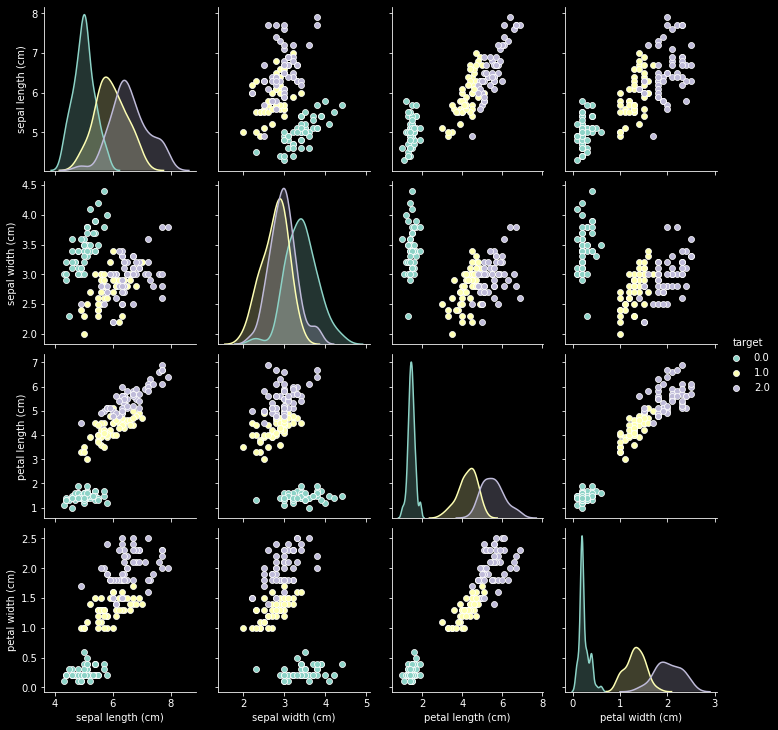

In [7]:
a=sns.pairplot(iris_pd, hue = "target")

In [57]:
selected_cols = iris_pd[["petal width (cm)", "sepal length (cm)","target"]]

In [58]:
selected_cols = selected_cols.rename(columns={"petal width (cm)": "pedal_width", "sepal length (cm)": "sepal_length"})

In [59]:
selected_cols

,pedal_width,sepal_length,target
0,0.2,5.1,0.0
1,0.2,4.9,0.0
2,0.2,4.7,0.0
3,0.2,4.6,0.0
4,0.2,5.0,0.0
...,...,...,...
145,2.3,6.7,2.0
146,1.9,6.3,2.0
147,2.0,6.5,2.0
148,2.3,6.2,2.0


In [60]:
temp_pd = iris_pd[["sepal width (cm)", "sepal length (cm)", "target"]]

In [61]:
temp_pd

,sepal width (cm),sepal length (cm),target
0,3.5,5.1,0.0
1,3.0,4.9,0.0
2,3.2,4.7,0.0
3,3.1,4.6,0.0
4,3.6,5.0,0.0
...,...,...,...
145,3.0,6.7,2.0
146,2.5,6.3,2.0
147,3.0,6.5,2.0
148,3.4,6.2,2.0


In [62]:
temp_pd.groupby(['target']).size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [64]:
temp_pd = temp_pd.rename(columns={"sepal width (cm)": "pedal_width", "sepal length (cm)": "sepal_length"})

In [65]:
temp_pd[["sepal_width"]] =  np.log(temp_pd[["sepal_width"]])

KeyError: "None of [Index(['sepal_width'], dtype='object')] are in the [columns]"

In [52]:
temp_pd['target'] = temp_pd['target'].astype('category')

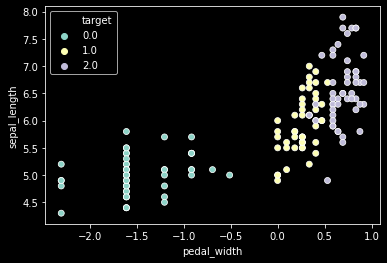

In [53]:
sns.scatterplot(data=temp_pd, x="pedal_width", y="sepal_length", hue="target")

In [42]:
temp_pd

,pedal_width,sepal_length,target
0,-1.609438,5.1,0.0
1,-1.609438,4.9,0.0
2,-1.609438,4.7,0.0
3,-1.609438,4.6,0.0
4,-1.609438,5.0,0.0
...,...,...,...
145,0.832909,6.7,2.0
146,0.641854,6.3,2.0
147,0.693147,6.5,2.0
148,0.832909,6.2,2.0
